In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
id= "only for test & sample submission files, id for prediction sample identification"
price= "price in USD"
carat= "weight of the diamond"
cut= "quality of the cut (Fair, Good, Very Good, Premium, Ideal)"
color= "diamond colour"
clarity= "a measurement of how clear the diamond is"
x= "length in mm"
y= "width in mm"
z= "depth in mm"
depth= "total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)"
table= "width of top of diamond relative to widest point (43--95)"

In [3]:
df = pd.read_csv("data/train.csv")


In [4]:
df.reset_index(drop=True,inplace=True)

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [6]:
df.isnull().sum()/df.shape[0]

id         0.0
carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(40455, 11)

## Variables numericas

C:\Users\egcmo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


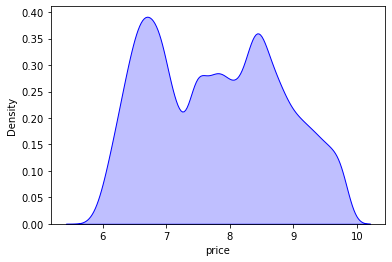

In [9]:
sns.distplot(
    df.price, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1}); #igual hay que hacer varias montañas

In [10]:
num = df.select_dtypes(include = np.number)
num.head()

,id,carat,depth,table,x,y,z,price
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588


In [11]:
num.drop("id", axis=1, inplace=True)

In [12]:
num.drop("price", axis=1, inplace=True)

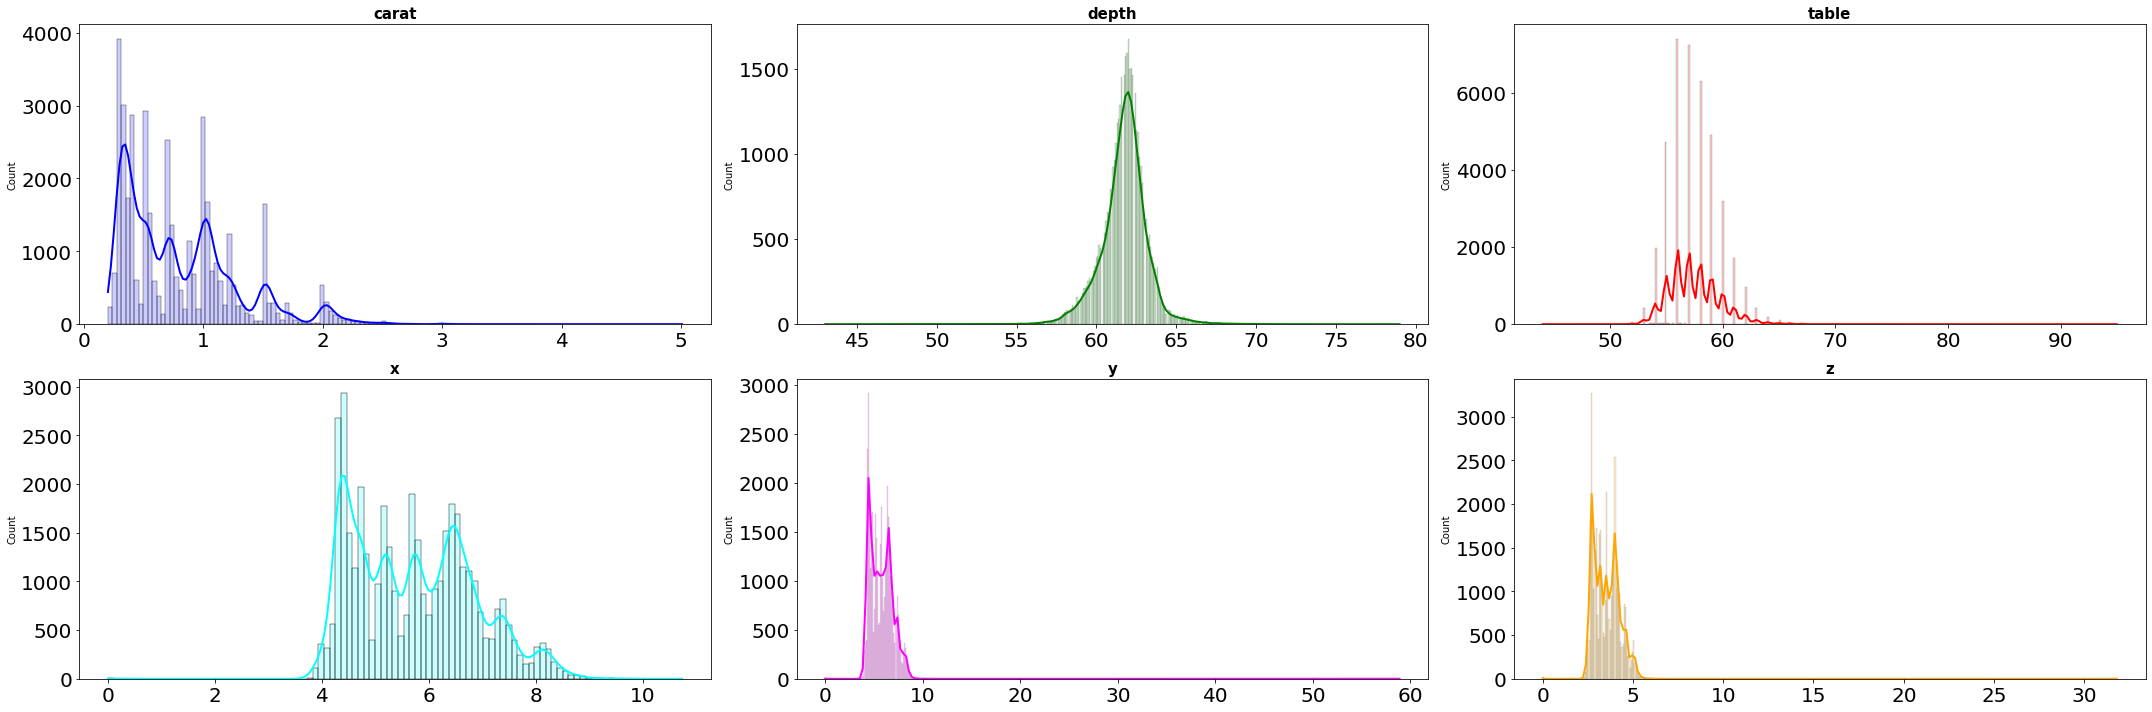

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat


for i, colum in enumerate(num): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [14]:
"""fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat


for i, colum in enumerate(num):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();"""

'fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))\n\nlista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]\n\naxes = axes.flat\n\n\nfor i, colum in enumerate(num):\n    sns.regplot(\n        x = df[colum], \n        y = df["price"], \n        color = "gray", \n        marker = ".", \n        scatter_kws = {"alpha": 0.4}, \n        line_kws = {"color": "red", "alpha": 0.7 }, \n        ax = axes[i])\n    \n    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")\n    axes[i].tick_params(labelsize = 20)\n    axes[i].set_xlabel("")\n    axes[i].set_ylabel("")\n    \nfig.tight_layout();'

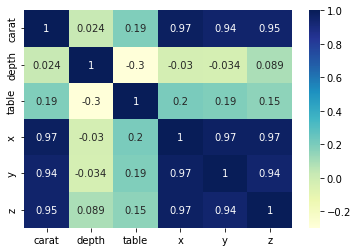

In [15]:
sns.heatmap(num.corr(), 
           cmap = "YlGnBu", 
           annot = True); #el carat y y/x/z

## Categoricas

In [16]:
df_categoricas=df.select_dtypes(include="object")
df_categoricas.head(2)

,cut,color,clarity
0,Premium,D,SI2
1,Ideal,E,VVS2


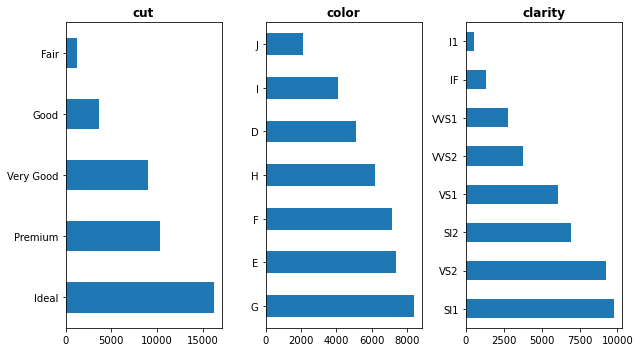

In [17]:

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

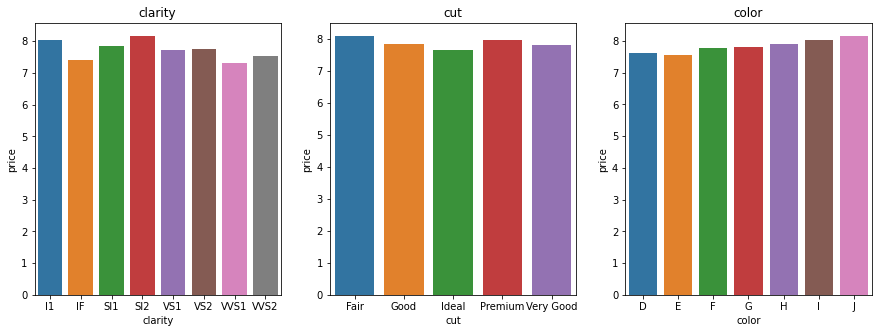

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

# Hacemos un bucle for para graficar cada columna en un subgráfico diferente
for i, columna in enumerate(["clarity", "cut", "color"]):
    df_relacion_cate = df.groupby(columna)["price"].mean().reset_index()
    sns.barplot(data=df_relacion_cate, x=columna, y="price", ax=axs[i])
    axs[i].set_title(columna)

# Mostramos la figura
plt.show()

## Outliers

In [19]:
df_numericas = df.select_dtypes(include=np.number)

In [20]:
df_numericas.drop("id", axis=1, inplace=True)

In [21]:
df_numericas.head()

,carat,depth,table,x,y,z,price
0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,62.3,59.0,4.50,4.55,2.82,6.588


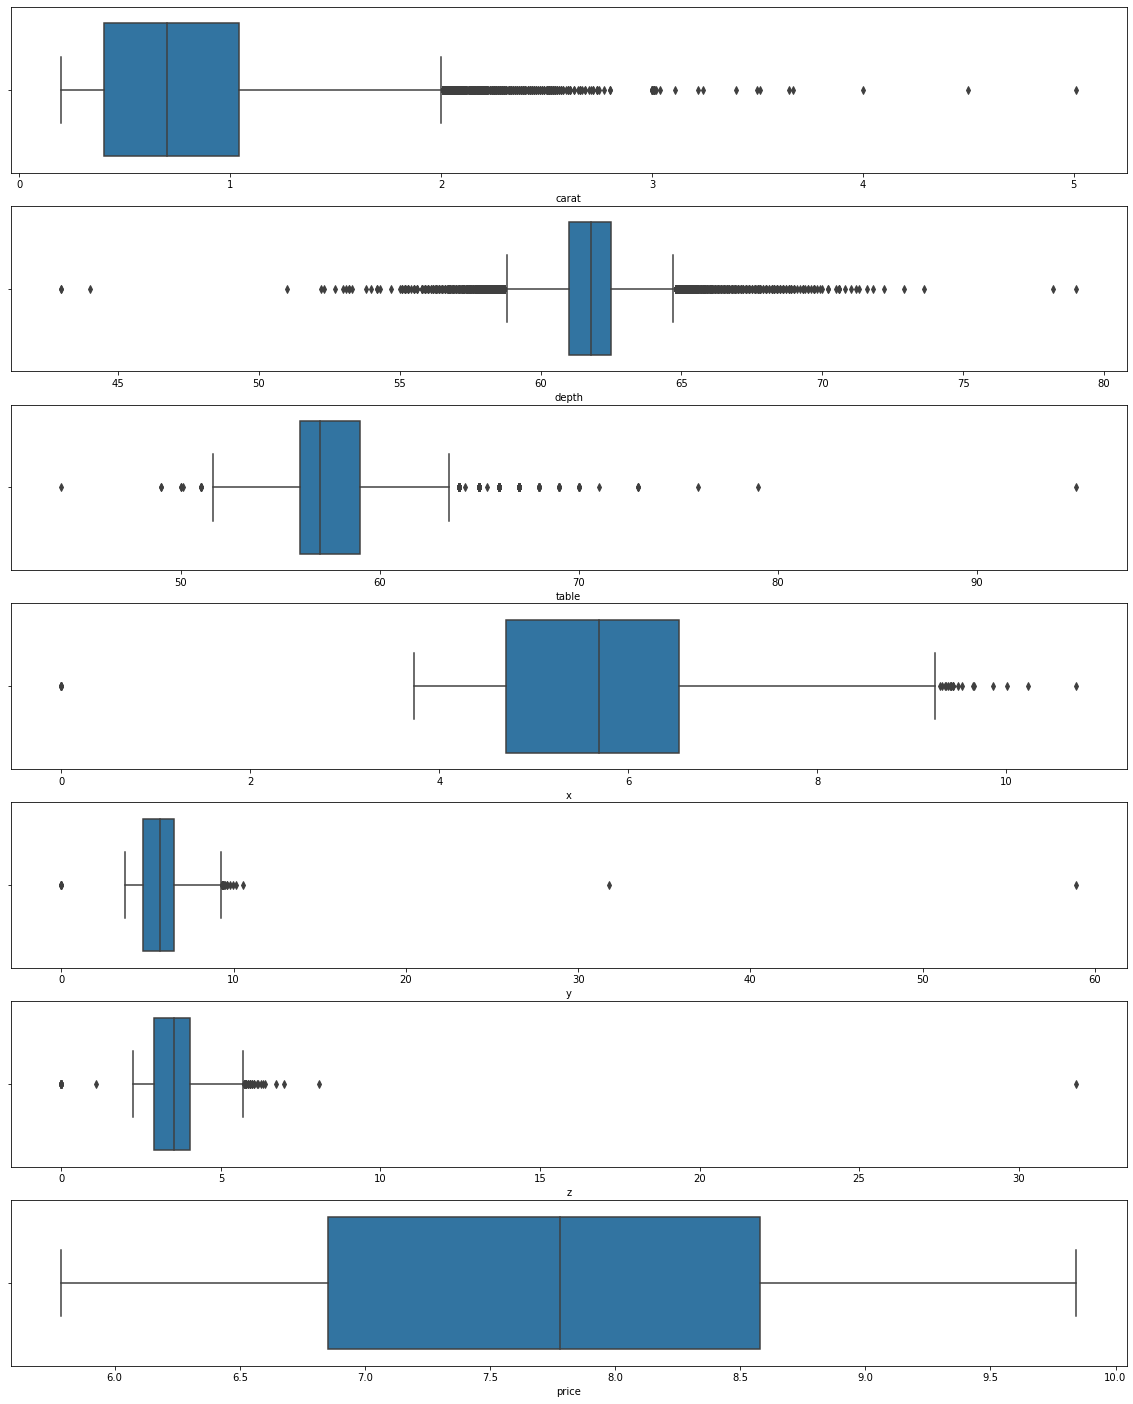

In [22]:
fig, ax = plt.subplots(7, 1, figsize=(20,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [23]:
def detectar_outliers_limits(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        #calculamos los límites inferior y superior
        IQR = Q3 - Q1
        limite_inf = Q1 - 4 * IQR
        limite_sup = Q3 + 4 * IQR

        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < limite_inf) | (dataframe[col] > limite_sup)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = list(outliers_data.index) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [24]:
lista_columnas=df_numericas.columns

In [25]:
delete=detectar_outliers_limits(lista_columnas, df)

In [26]:
for k, v in delete.items():
    try:
        df = df.drop(v)
    except:
        print(f"el index {v} no esta en df")

el index [15557, 18774, 31243, 31713, 33452, 39191] no esta en df


In [27]:
df_numericas = df.select_dtypes(include=np.number)

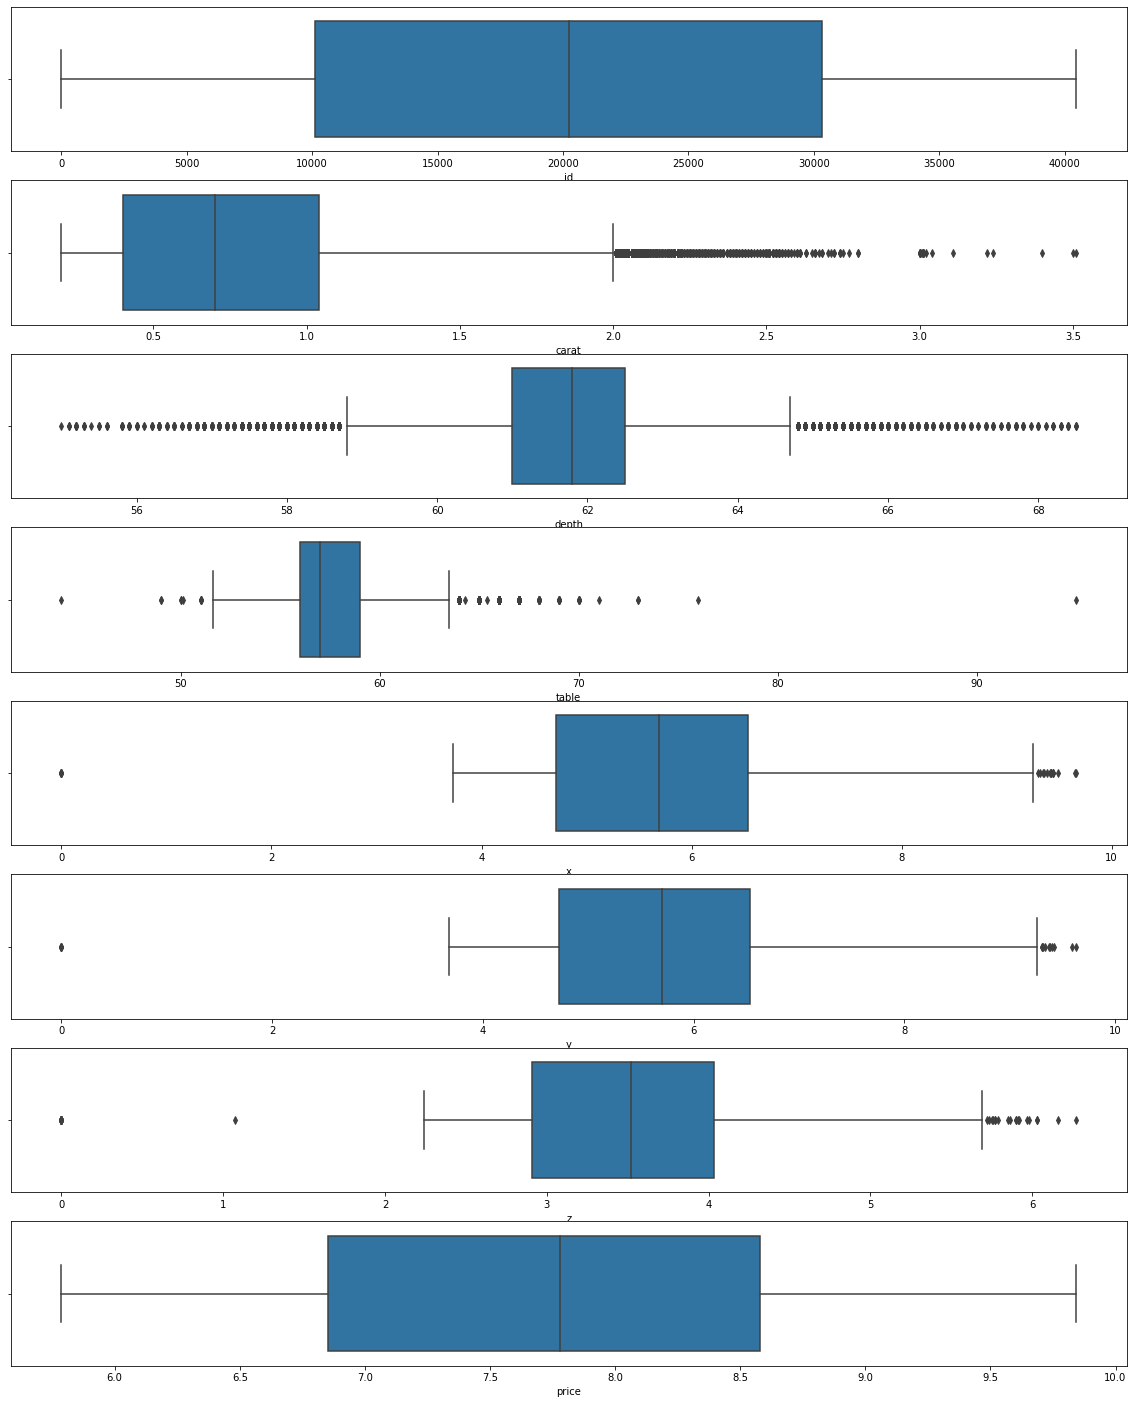

In [28]:
fig, ax = plt.subplots(8, 1, figsize=(20,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show() #mejor! ahora voy a remplazar y el q0 de "x, y, Z" tb me lo cargo

In [29]:
cols = ["x", "y", "z"] # lista de columnas a verificar

for col in cols:
    Q0 = np.nanpercentile(df[col], 0) # calculamos el percentil 0 para la columna
    idx_to_drop = df.index[df[col] == Q0] # encontramos los índices de las filas que contienen Q0
    if len(idx_to_drop) > 0: # verificamos si hay filas que eliminar
        df.drop(idx_to_drop, inplace=True) # eliminamos las filas correspondientes a los índices encontrados

In [30]:
df.to_csv("data/train1.csv")